In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [218]:
df = pd.read_csv('BTP_4.csv')

In [219]:
df.sample(5)

,Surface Tension,Contact Angle,viscosity,TA,AW,TL,FL
98,23.47,10.44,11.02,69.50,39.50,29.00,24.40
134,25.70,20.30,19.48,65.38,37.96,14.40,9.50
24,29.09,16.00,13.44,43.34,26.65,10.16,5.60
64,21.86,22.01,13.06,78.46,38.59,17.55,12.22
205,29.40,17.10,11.94,48.00,28.80,12.30,7.60


In [220]:
features_input = np.array(['Surface Tension','Contact Angle','viscosity'])
features_output = np.array(['TA','AW','TL','FL'])

### Random Forest Regression

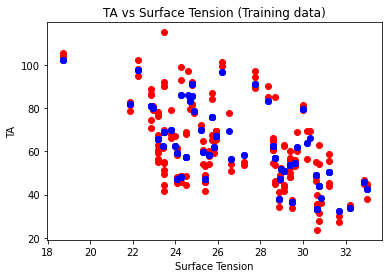

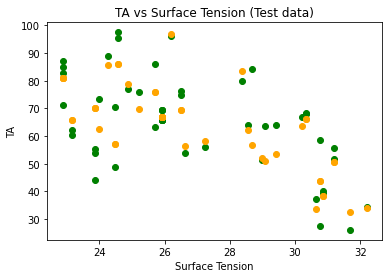

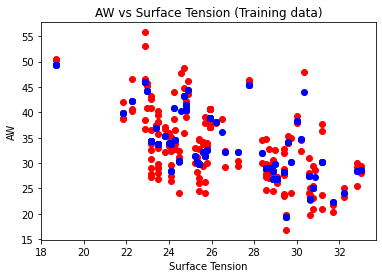

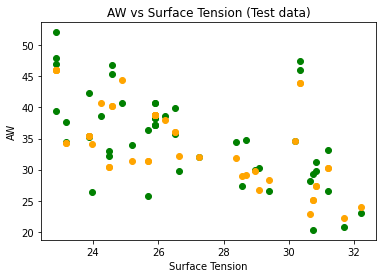

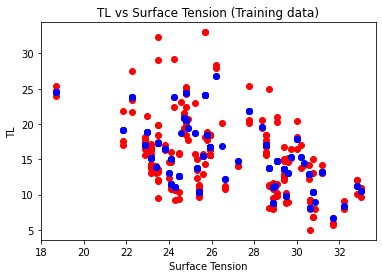

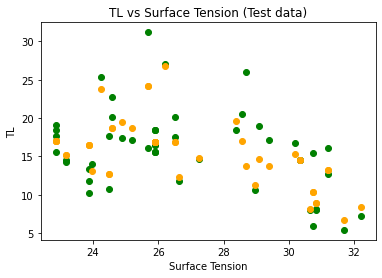

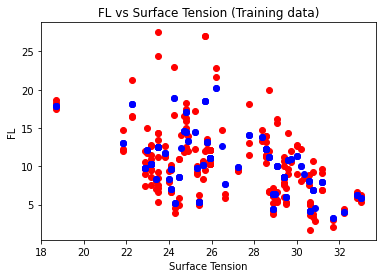

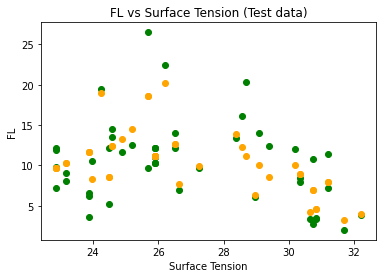

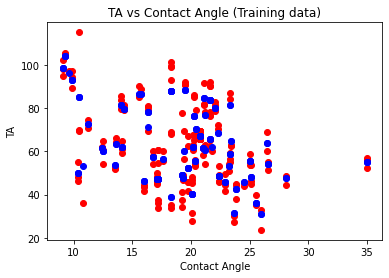

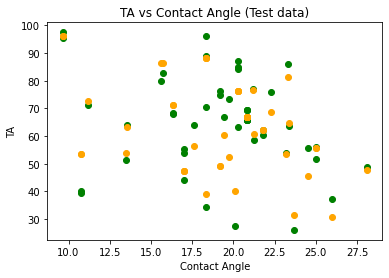

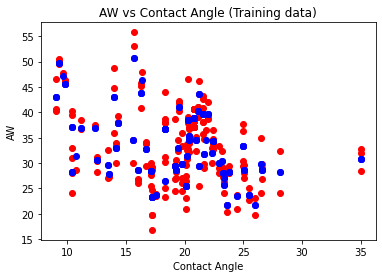

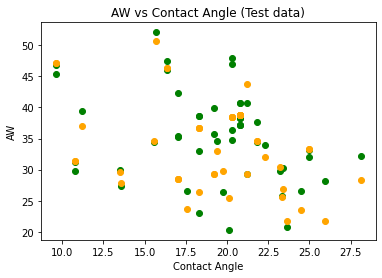

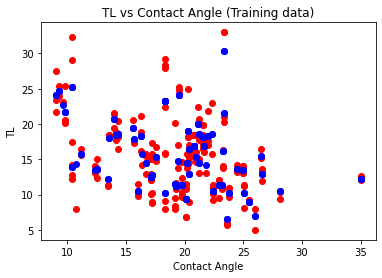

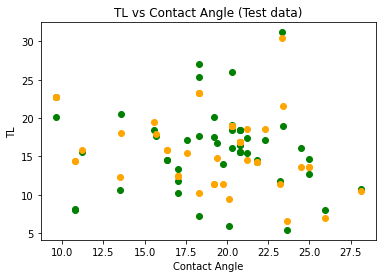

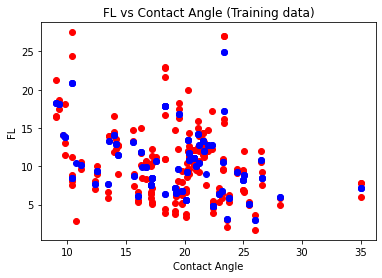

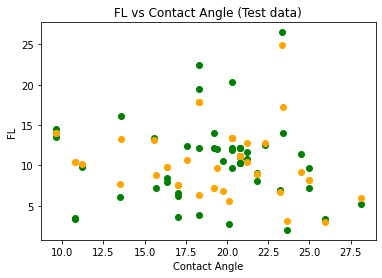

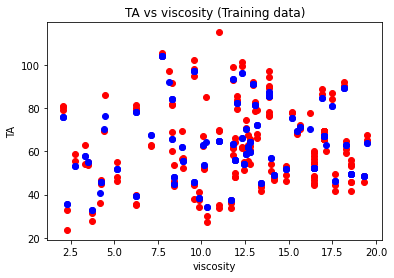

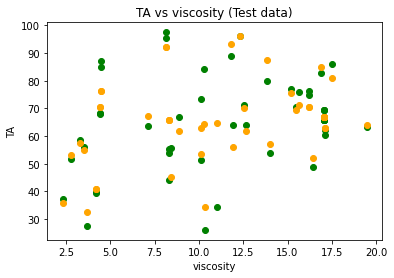

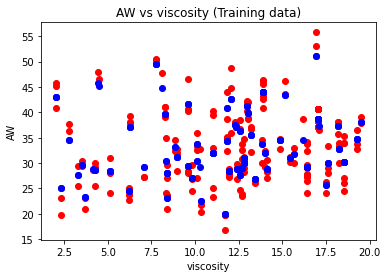

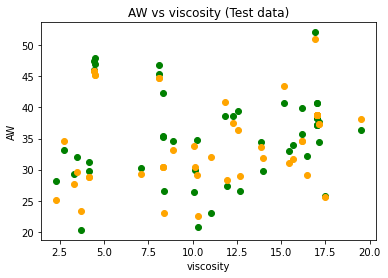

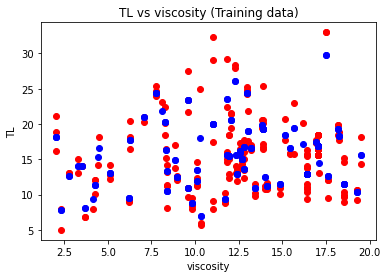

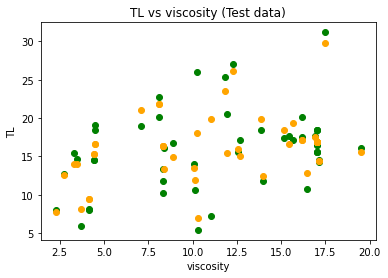

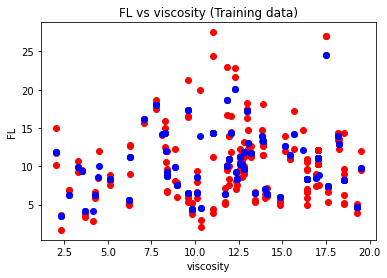

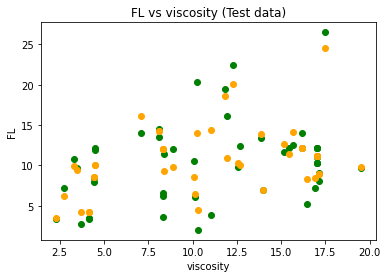

In [221]:
validation = pd.DataFrame(columns=['Title','mse','mae','rmse','r2'])

for feature1 in features_input:
    for feature2 in features_output:
        x = feature1
        y = feature2
        X=df[x]
        Y=df[y]
        
        k=5
        kf = KFold(n_splits=k, shuffle=True, random_state=40)
        mse_scores = []
        mae_scores = []
        rmse_scores = []
        r2_scores = []
        model = RandomForestRegressor(n_estimators=100)
        

        min_mse = 1e9
        x_train_scat = pd.DataFrame()
        y_train_scat = pd.Series(dtype='float64')
        x_train_plot = pd.Series(dtype='float64')
        y_train_plot = np.array([])
        x_test_scat = pd.DataFrame()
        y_test_scat = pd.Series(dtype='float64')
        y_test_plot = np.array([])

        for train_index, test_index in kf.split(X):
            
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            x_train = pd.DataFrame(x_train, columns=[x])
            x_test = pd.DataFrame(x_test, columns=[x])
     
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            y_pred_train = model.predict(x_train)
            
            mse_scores.append(mean_squared_error(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            r2_scores.append(r2_score(y_test,y_pred))

            if mean_squared_error(y_test, y_pred) < min_mse:
                min_X = X
                x_train_scat = x_train
                y_train_scat = y_train
                x_train_plot = X[train_index]
                y_train_plot = y_pred_train
                x_test_scat = x_test
                y_test_scat = y_test
                y_test_plot = y_pred


        plt.scatter(x_train_scat,y_train_scat,color='red')
        plt.scatter(x_train_plot,y_train_plot,color='blue')
        plt.title(y+' vs '+x+' (Training data)')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

        plt.scatter(x_test_scat,y_test_scat,color='green')
        plt.scatter(x_test_scat,y_test_plot,color='orange')
        plt.title(y+' vs '+x+' (Test data)')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()
        
        mse = np.mean(mse_scores)
        mae = np.mean(mae_scores)
        rmse = np.mean(rmse_scores)
        r2 = np.mean(r2_scores)
        
        val = {'Title':[feature1+' vs '+feature2],
                      'mse':[mse],
                      'mae':[mae],
                      'rmse':[rmse],
                      'r2':[r2]}
        val = pd.DataFrame(val)
        validation = pd.concat([validation, val], ignore_index=True)

In [222]:
validation

,Title,mse,mae,rmse,r2
0,Surface Tension vs TA,110.326140,7.415966,10.360678,0.655464
1,Surface Tension vs AW,16.587662,3.125421,4.058905,0.677699
2,Surface Tension vs TL,13.967903,2.564393,3.709556,0.484384
3,Surface Tension vs FL,11.859734,2.347978,3.417896,0.453216
4,Contact Angle vs TA,86.621210,6.558892,9.280693,0.723221
5,Contact Angle vs AW,15.294443,2.934652,3.899177,0.705158
6,Contact Angle vs TL,8.087894,2.090994,2.833627,0.698881
7,Contact Angle vs FL,7.364586,1.959519,2.696759,0.662857
8,viscosity vs TA,118.612683,6.957800,10.532046,0.623627
9,viscosity vs AW,15.853997,2.910356,3.938538,0.697032


In [223]:
X = df[features_input]
Y = df[features_output]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [224]:
rf = RandomForestRegressor()

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [225]:
bootstrap = [True, False]
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [226]:
rf = RandomForestRegressor(random_state = 42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                        n_iter = 100, scoring='neg_mean_absolute_error', 
                        cv = 3, verbose=2, random_state=42, n_jobs=-1,
                        return_train_score=True)

In [227]:
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=466; total time=   1.0s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=466; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=466; total time=   0.8s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=466; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=911; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=911; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, min_

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [228]:
rf_random.best_params_

{'n_estimators': 466,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None,
 'bootstrap': False}

In [229]:
best_random = rf_random.best_estimator_
Y_pred = best_random.predict(X_test)

In [230]:
print('mean_squared_error : ',mean_squared_error(Y_test, Y_pred))
print('mean_absolute_error : ',mean_absolute_error(Y_test, Y_pred))
print('mean_squared_error : ',np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('r2_score : ',r2_score(Y_test, Y_pred))

mean_squared_error :  20.57405344906602
mean_absolute_error :  2.5593612368024132
mean_squared_error :  4.535863032441127
r2_score :  0.7959392290817433


In [231]:
param_grid = {
    'bootstrap': [False],
    'max_depth': [50, 60, 70, 80, 90],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [200, 300, 400, 500, 600]
}


rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)


In [232]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_depth': [50, 60, 70, 80, 90],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [200, 300, 400, 500, 600]},
             return_train_score=True, verbose=2)

In [233]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [234]:
best_grid = grid_search.best_estimator_
Y_pred = best_grid.predict(X_test)
Y_pred_train = best_grid.predict(X_train)

In [235]:
print('mean_squared_error : ',mean_squared_error(Y_test, Y_pred))
print('mean_absolute_error : ',mean_absolute_error(Y_test, Y_pred))
print('mean_squared_error : ',np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('r2_score : ',r2_score(Y_test, Y_pred))

mean_squared_error :  20.57405344906607
mean_absolute_error :  2.5593612368024226
mean_squared_error :  4.535863032441133
r2_score :  0.7959392290817425


In [236]:
Y_pred = pd.DataFrame(Y_pred, columns=features_output)
Y_pred_train = pd.DataFrame(Y_pred_train, columns=features_output)

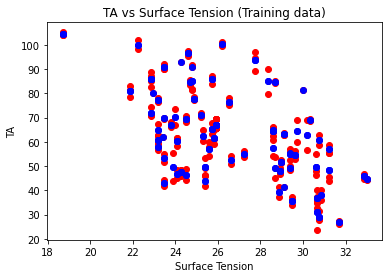

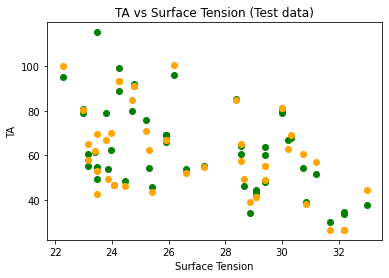

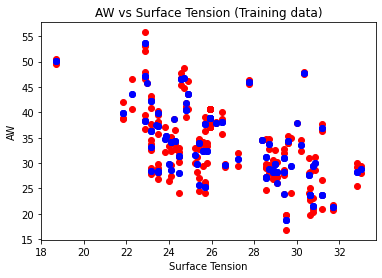

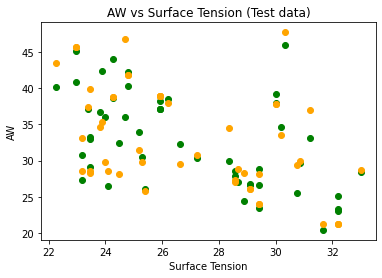

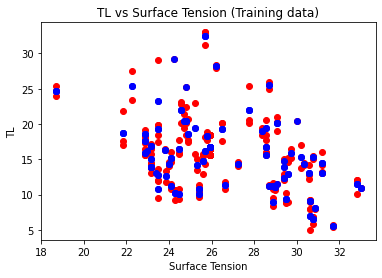

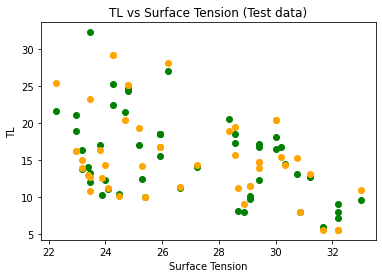

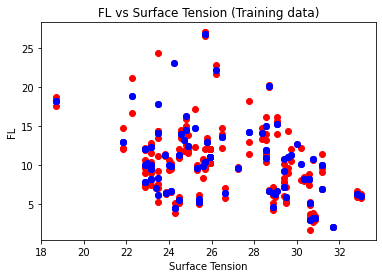

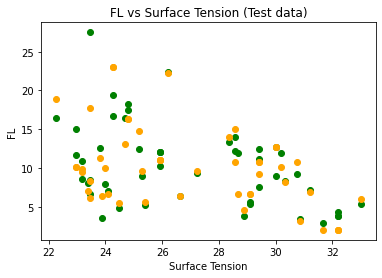

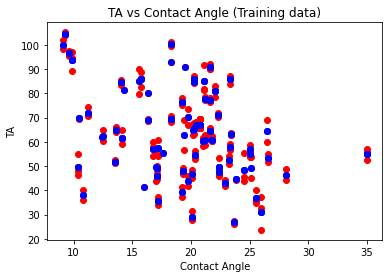

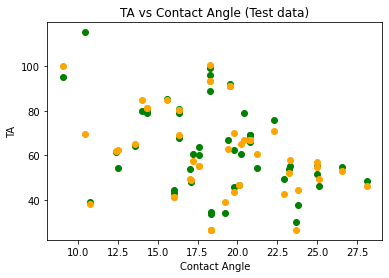

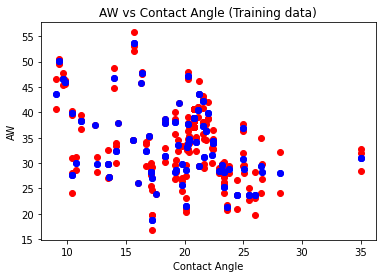

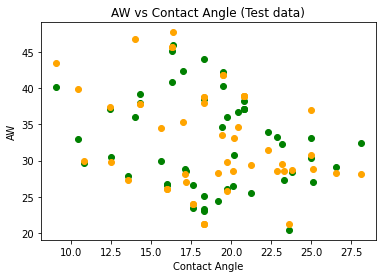

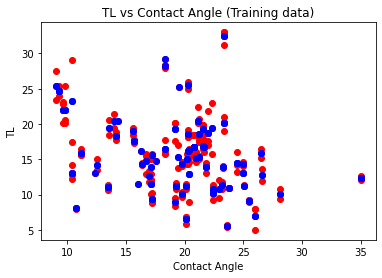

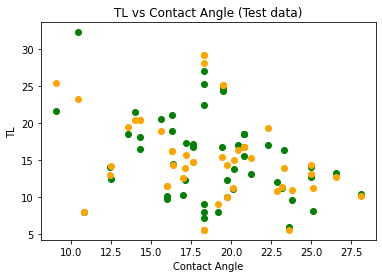

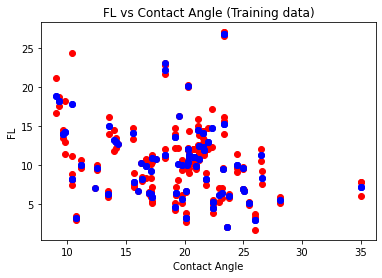

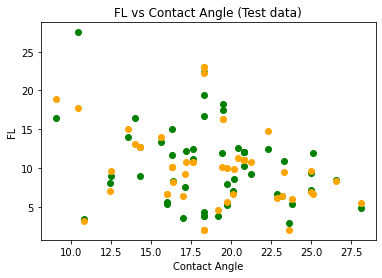

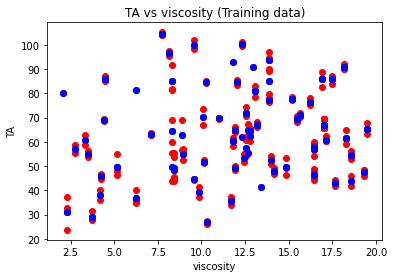

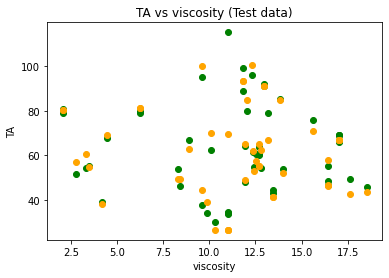

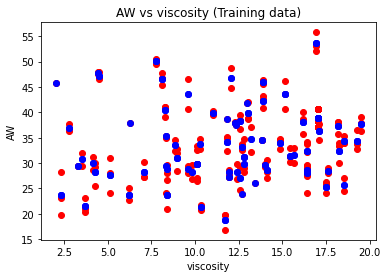

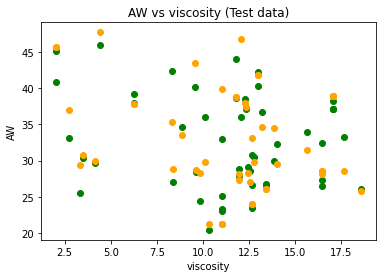

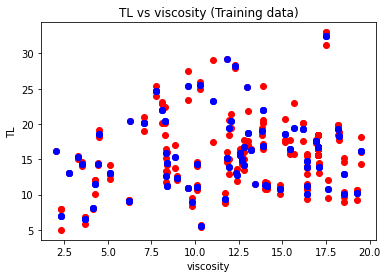

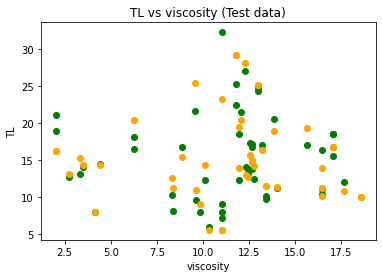

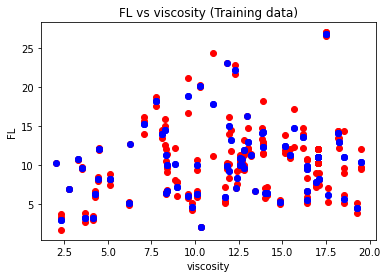

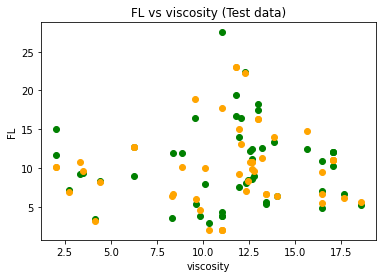

In [237]:
for feature1 in features_input:
    for feature2 in features_output:
        x = feature1
        y = feature2
        

        x_train_scat = X_train[x]
        y_train_scat = Y_train[y]
        y_train_plot = Y_pred_train[y]
        x_test_scat = X_test[x]
        y_test_scat = Y_test[y]
        y_test_plot = Y_pred[y]


        plt.scatter(x_train_scat,y_train_scat,color='red')
        plt.scatter(x_train_scat,y_train_plot,color='blue')
        plt.title(y+' vs '+x+' (Training data)')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

        plt.scatter(x_test_scat,y_test_scat,color='green')
        plt.scatter(x_test_scat,y_test_plot,color='orange')
        plt.title(y+' vs '+x+' (Test data)')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

In [238]:
validation = pd.DataFrame(columns=['Title','mse','mae','rmse','r2'])

mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

for feature in features_output:

    mse = mean_squared_error(Y_test[feature], Y_pred[feature])
    mae = mean_absolute_error(Y_test[feature], Y_pred[feature])
    rmse = np.sqrt(mean_squared_error(Y_test[feature], Y_pred[feature]))
    r2 = r2_score(Y_test[feature], Y_pred[feature])

    val = {'Title':[feature],
            'mse':[mse],
            'mae':[mae],
            'rmse':[rmse],
            'r2':[r2]}
    
    val = pd.DataFrame(val)
    validation = pd.concat([validation, val], ignore_index=True)

In [239]:
validation

,Title,mse,mae,rmse,r2
0,TA,60.269035,4.432439,7.763313,0.840488
1,AW,9.985956,2.289463,3.160056,0.756261
2,TL,6.215247,1.854427,2.493040,0.806102
3,FL,5.825975,1.661116,2.413706,0.780906
